In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
models = [
    'unet-b2-LB-0.89169', 
    'unet-b5-LB-0.91515', 
    'fpn-b5-LB-0.90652', 
    'fpn-b5-LB-0.90496', 
    'fpn-b5-LB-0.90547', 
    'fpn-b5-LB-0.91276',
    'se_resnext50_32x4d', 
    'mobilenet2', 
    'resnet34',
    'mean'
]

diffs = np.array(
        [[[0.0000e+00, 3.3840e-01, 6.5376e-01, 7.9940e-01, 5.1933e-01,
          4.0983e-01, 2.8370e-01, 7.5920e-01, 4.9149e-01, 4.7164e-01],
         [3.3840e-01, 0.0000e+00, 4.3244e-01, 5.5324e-01, 3.3109e-01,
          2.1162e-01, 3.7949e-01, 6.0213e-01, 4.4799e-01, 3.4946e-01],
         [6.5376e-01, 4.3244e-01, 0.0000e+00, 4.8196e-01, 4.2667e-01,
          3.5576e-01, 6.3472e-01, 7.1916e-01, 6.2420e-01, 4.5044e-01],
         [7.9940e-01, 5.5324e-01, 4.8196e-01, 0.0000e+00, 5.4905e-01,
          5.0400e-01, 7.5018e-01, 7.5652e-01, 7.1774e-01, 5.3538e-01],
         [5.1933e-01, 3.3109e-01, 4.2667e-01, 5.4905e-01, 0.0000e+00,
          3.2876e-01, 5.4438e-01, 6.6755e-01, 5.7551e-01, 3.9822e-01],
         [4.0983e-01, 2.1162e-01, 3.5576e-01, 5.0400e-01, 3.2876e-01,
          0.0000e+00, 4.0783e-01, 6.2297e-01, 4.6201e-01, 3.3739e-01],
         [2.8370e-01, 3.7949e-01, 6.3472e-01, 7.5018e-01, 5.4438e-01,
          4.0783e-01, 0.0000e+00, 7.4668e-01, 5.0372e-01, 4.6190e-01],
         [7.5920e-01, 6.0213e-01, 7.1916e-01, 7.5652e-01, 6.6755e-01,
          6.2297e-01, 7.4668e-01, 0.0000e+00, 7.5037e-01, 5.8763e-01],
         [4.9149e-01, 4.4799e-01, 6.2420e-01, 7.1774e-01, 5.7551e-01,
          4.6201e-01, 5.0372e-01, 7.5037e-01, 0.0000e+00, 4.9144e-01],
         [4.7164e-01, 3.4946e-01, 4.5044e-01, 5.3538e-01, 3.9822e-01,
          3.3739e-01, 4.6190e-01, 5.8763e-01, 4.9144e-01, 0.0000e+00]],

        [[0.0000e+00, 2.1987e-02, 1.2053e-01, 1.2956e-01, 6.7450e-02,
          8.1309e-03, 7.3072e-02, 1.4304e-01, 1.5074e-01, 7.8944e-02],
         [2.1987e-02, 0.0000e+00, 1.2284e-01, 1.2465e-01, 6.5362e-02,
          2.0740e-02, 7.6380e-02, 1.4098e-01, 1.5591e-01, 7.8287e-02],
         [1.2053e-01, 1.2284e-01, 0.0000e+00, 1.5213e-01, 1.2969e-01,
          1.1444e-01, 1.6378e-01, 2.1696e-01, 2.2858e-01, 1.3411e-01],
         [1.2956e-01, 1.2465e-01, 1.5213e-01, 0.0000e+00, 1.1825e-01,
          1.2324e-01, 1.7338e-01, 2.1805e-01, 2.2251e-01, 1.3435e-01],
         [6.7450e-02, 6.5362e-02, 1.2969e-01, 1.1825e-01, 0.0000e+00,
          6.0968e-02, 1.1629e-01, 1.7821e-01, 1.7283e-01, 9.4036e-02],
         [8.1309e-03, 2.0740e-02, 1.1444e-01, 1.2324e-01, 6.0968e-02,
          0.0000e+00, 6.9011e-02, 1.3872e-01, 1.4662e-01, 7.5065e-02],
         [7.3072e-02, 7.6380e-02, 1.6378e-01, 1.7338e-01, 1.1629e-01,
          6.9011e-02, 0.0000e+00, 1.7975e-01, 1.9053e-01, 1.1346e-01],
         [1.4304e-01, 1.4098e-01, 2.1696e-01, 2.1805e-01, 1.7821e-01,
          1.3872e-01, 1.7975e-01, 0.0000e+00, 2.4232e-01, 1.5665e-01],
         [1.5074e-01, 1.5591e-01, 2.2858e-01, 2.2251e-01, 1.7283e-01,
          1.4662e-01, 1.9053e-01, 2.4232e-01, 0.0000e+00, 1.6411e-01],
         [7.8944e-02, 7.8287e-02, 1.3411e-01, 1.3435e-01, 9.4036e-02,
          7.5065e-02, 1.1346e-01, 1.5665e-01, 1.6411e-01, 0.0000e+00]],

        [[0.0000e+00, 6.3183e+00, 6.8883e+00, 7.0638e+00, 7.0786e+00,
          6.3656e+00, 7.9234e+00, 7.5923e+00, 8.1864e+00, 6.0543e+00],
         [6.3183e+00, 0.0000e+00, 2.5000e+00, 2.7427e+00, 3.0065e+00,
          1.8456e+00, 5.1739e+00, 6.6058e+00, 4.8662e+00, 3.5067e+00],
         [6.8883e+00, 2.5000e+00, 0.0000e+00, 2.8827e+00, 3.3162e+00,
          2.3327e+00, 5.7240e+00, 7.0611e+00, 5.3136e+00, 3.6489e+00],
         [7.0638e+00, 2.7427e+00, 2.8827e+00, 0.0000e+00, 3.4554e+00,
          2.5545e+00, 5.8774e+00, 7.1279e+00, 5.3405e+00, 3.7780e+00],
         [7.0786e+00, 3.0065e+00, 3.3162e+00, 3.4554e+00, 0.0000e+00,
          2.7724e+00, 6.0087e+00, 7.2682e+00, 5.7284e+00, 3.8815e+00],
         [6.3656e+00, 1.8456e+00, 2.3327e+00, 2.5545e+00, 2.7724e+00,
          0.0000e+00, 5.2596e+00, 6.7174e+00, 4.9461e+00, 3.3213e+00],
         [7.9234e+00, 5.1739e+00, 5.7240e+00, 5.8774e+00, 6.0087e+00,
          5.2596e+00, 0.0000e+00, 8.1434e+00, 6.5506e+00, 5.4690e+00],
         [7.5923e+00, 6.6058e+00, 7.0611e+00, 7.1279e+00, 7.2682e+00,
          6.7174e+00, 8.1434e+00, 0.0000e+00, 7.5350e+00, 6.0866e+00],
         [8.1864e+00, 4.8662e+00, 5.3136e+00, 5.3405e+00, 5.7284e+00,
          4.9461e+00, 6.5506e+00, 7.5350e+00, 0.0000e+00, 5.1864e+00],
         [6.0543e+00, 3.5067e+00, 3.6489e+00, 3.7780e+00, 3.8815e+00,
          3.3213e+00, 5.4690e+00, 6.0866e+00, 5.1864e+00, 0.0000e+00]],

        [[0.0000e+00, 1.5265e+00, 1.6955e+00, 1.6895e+00, 1.7159e+00,
          1.5006e+00, 1.6729e+00, 1.6227e+00, 1.7712e+00, 1.3710e+00],
         [1.5265e+00, 0.0000e+00, 7.1173e-01, 7.7481e-01, 9.4964e-01,
          5.5108e-01, 1.1411e+00, 1.5169e+00, 1.3479e+00, 8.9170e-01],
         [1.6955e+00, 7.1173e-01, 0.0000e+00, 8.1708e-01, 9.0416e-01,
          6.6812e-01, 1.3571e+00, 1.7144e+00, 1.5049e+00, 9.2543e-01],
         [1.6895e+00, 7.7481e-01, 8.1708e-01, 0.0000e+00, 9.2429e-01,
          7.6467e-01, 1.2958e+00, 1.6340e+00, 1.4609e+00, 9.3758e-01],
         [1.7159e+00, 9.4964e-01, 9.0416e-01, 9.2429e-01, 0.0000e+00,
          8.6328e-01, 1.4385e+00, 1.7335e+00, 1.5400e+00, 9.9592e-01],
         [1.5006e+00, 5.5108e-01, 6.6812e-01, 7.6467e-01, 8.6328e-01,
          0.0000e+00, 1.1913e+00, 1.5413e+00, 1.3832e+00, 8.3431e-01],
         [1.6729e+00, 1.1411e+00, 1.3571e+00, 1.2958e+00, 1.4385e+00,
          1.1913e+00, 0.0000e+00, 1.6650e+00, 1.5144e+00, 1.2136e+00],
         [1.6227e+00, 1.5169e+00, 1.7144e+00, 1.6340e+00, 1.7335e+00,
          1.5413e+00, 1.6650e+00, 0.0000e+00, 1.5639e+00, 1.3517e+00],
         [1.7712e+00, 1.3479e+00, 1.5049e+00, 1.4609e+00, 1.5400e+00,
          1.3832e+00, 1.5144e+00, 1.5639e+00, 0.0000e+00, 1.2977e+00],
         [1.3710e+00, 8.9170e-01, 9.2543e-01, 9.3758e-01, 9.9592e-01,
          8.3431e-01, 1.2136e+00, 1.3517e+00, 1.2977e+00, 0.0000e+00]]])

In [9]:
dfs = [pd.DataFrame(diffs[c, :, :]) for c in range(4)]
for df in dfs:
    df.columns = models
    df.index = models

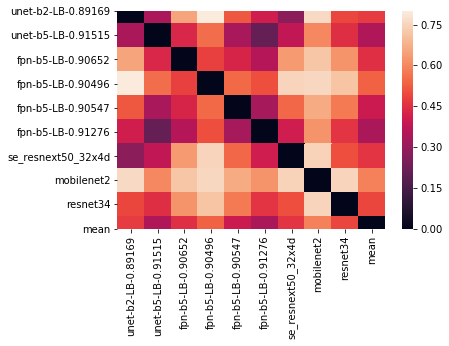

In [10]:
sns.heatmap(dfs[0])

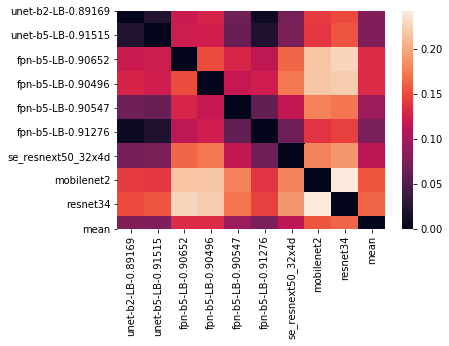

In [11]:
sns.heatmap(dfs[1])

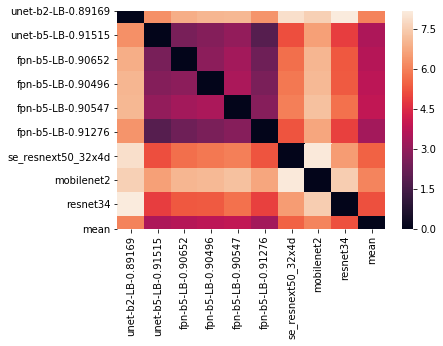

In [12]:
sns.heatmap(dfs[2])

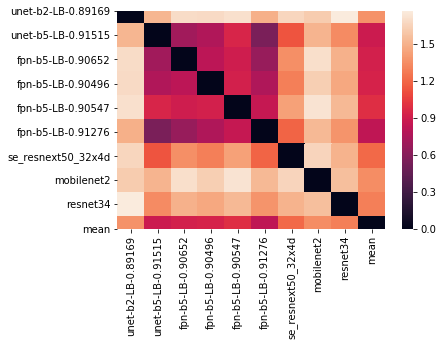

In [13]:
sns.heatmap(dfs[3])